<a href="https://colab.research.google.com/github/ppriyanshu26/Colab/blob/main/Models/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
# import modules

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [47]:
# Dataset

data = sns.load_dataset("penguins")

data.dropna()
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [48]:
# Split data

x = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = data['species']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [49]:
# Decision tree

dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)

dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [50]:
# Decision tree accuracy

dt_predictions = dt_model.predict(x_test)

dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy}")
dt_classification_report = classification_report(y_test, dt_predictions)
print("Decision Tree Classification Report:\n", dt_classification_report)
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)
print("Decision Tree Confusion Matrix:\n", dt_confusion_matrix)

Decision Tree Accuracy: 0.9903846153846154
Decision Tree Classification Report:
               precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        46
   Chinstrap       1.00      1.00      1.00        21
      Gentoo       1.00      0.97      0.99        37

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104

Decision Tree Confusion Matrix:
 [[46  0  0]
 [ 0 21  0]
 [ 1  0 36]]


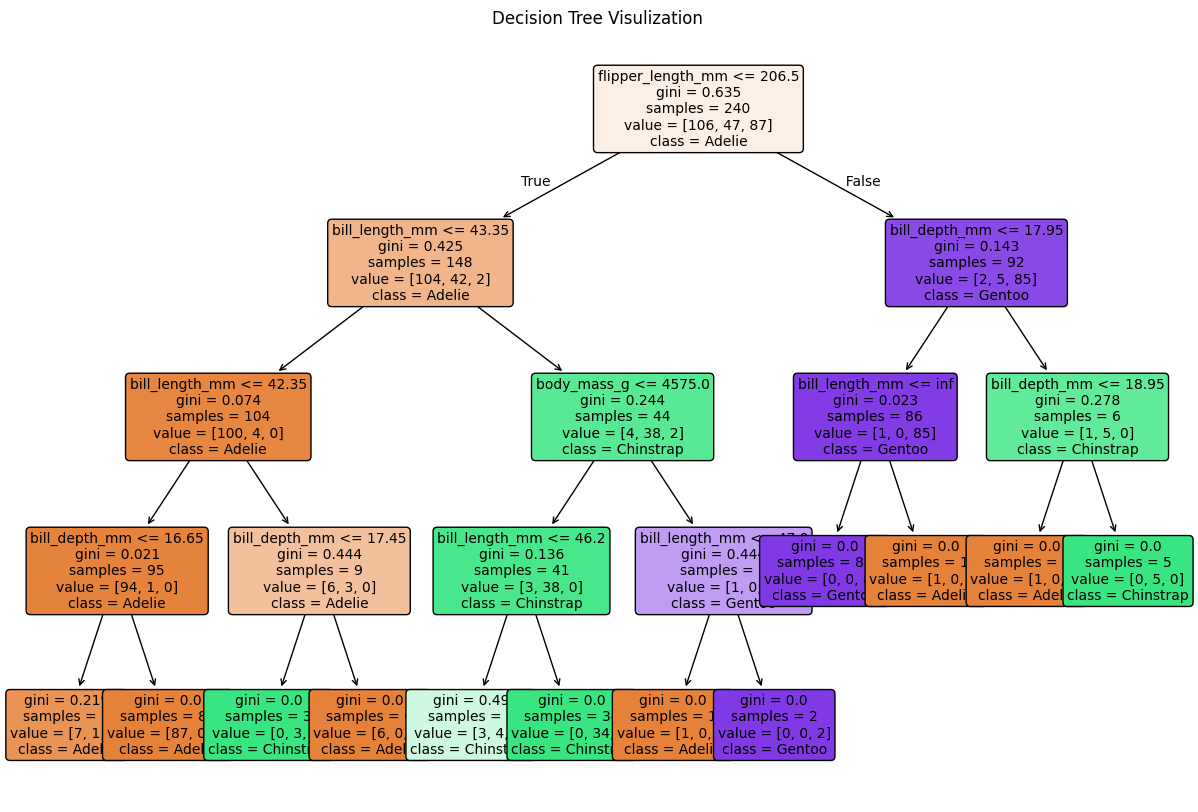

In [51]:
# Decision tree plot

plt.figure(figsize=(15, 10))
plot_tree(
    dt_model,
    filled=True,
    feature_names=x.columns,
    class_names=y.unique(),
    rounded=True,
    fontsize=10)
plt.title("Decision Tree Visulization")
plt.show()

In [52]:
# Random forest

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
# Random forest accuracy

rf_predictions = rf_model.predict(x_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")
rf_classification_report = classification_report(y_test, rf_predictions)
print("Random Forest Classification Report:\n", rf_classification_report)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)
print("Random Forest Confusion Matrix:\n", rf_confusion_matrix)

Random Forest Accuracy: 0.9807692307692307
Random Forest Classification Report:
               precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        46
   Chinstrap       0.95      1.00      0.98        21
      Gentoo       1.00      0.97      0.99        37

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104

Random Forest Confusion Matrix:
 [[45  1  0]
 [ 0 21  0]
 [ 1  0 36]]


In [54]:
# Comparison

print(f"Decision Tree Accuracy: {dt_accuracy:.5f}")
print(f"Random Forest Accuracy: {rf_accuracy:.5f}")

Decision Tree Accuracy: 0.99038
Random Forest Accuracy: 0.98077
